## Projeto Ciência de Dados 2 - Previsão de média escolar pelas horas de video game

- Nosso desafio é conseguir prever as 

### Integrantes: 

- Eduardo 
- Eric
- Felipe 
- Lourenco 

### Técnicas Aplicadas 

- Regressão Linear
- Random Forest 

### Link para o dataset completo

- https://www.kaggle.com/houstongen/videogame

## Introdução ao tema ...

" • Detalhar objetivo escolhido para trabalhar neste projeto juntamente com descrição da base de
dados. Pesquise trabalhos na literatura que discutam o tema escolhido. Para trabalhos
acadêmicos, acesse https://scholar.google.com.br/. Guarde as referências estudadas para citálas no seu projeto."

## Começando o projeto 

In [1]:
import pandas as pd
df = pd.read_csv("VideoGame.csv")
display(df)

,CASEID,V1,Grades,Happyness,AGE,Gender,Hrsincomputer,HrsInternet,VG,Hrs_Text,...,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23
0,1,2013,4,2,1,2,3,2,9,9,...,NaN,SUMMARY OUTPUT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2013,8,2,1,2,3,6,9,9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2013,3,2,2,1,3,2,3,6,...,NaN,Regression Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2013,4,2,1,-9,-9,-9,-9,-9,...,NaN,Multiple R,0.572332526,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2013,-9,-9,2,2,1,1,1,8,...,NaN,R Square,0.32756452,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2197,2198,2013,6,2,2,2,4,4,3,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2198,2199,2013,8,2,2,2,3,5,1,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2199,2200,2013,9,2,1,2,3,5,2,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2200,2201,2013,8,2,1,1,5,5,6,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Ajustes de Dados (Tratamento/Limpeza)

O que estamos buscando aqui de forma geral
são:
- Dados faltantes;
- Dados com valor 0(ZERO) quando deveriam ser valores coerentes;
- Outliers que não representam bem o histórico e logo não ajudam a criação do modelo;
- Erros na base;
- Erros de importação;

### Variaveis de interesse...

 Descreva as variáveis finais que serão utilizadas a partir deste ponto.
 Faça análise descritiva detalhada das variáveis, norteado pelo objetivo do problema. 

In [2]:
#remover as colunas apresentam valores nulos 
df = df.dropna(how='any',axis=1)

df.info() # dados estão numéricos e não nulos como deveriam ser

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2202 entries, 0 to 2201
Data columns (total 13 columns):
CASEID           2202 non-null int64
V1               2202 non-null int64
Grades           2202 non-null int64
Happyness        2202 non-null int64
AGE              2202 non-null int64
Gender           2202 non-null int64
Hrsincomputer    2202 non-null int64
HrsInternet      2202 non-null int64
VG               2202 non-null int64
Hrs_Text         2202 non-null int64
HrstalkCell      2202 non-null int64
HrsSocialNet     2202 non-null int64
HrsVideoChat     2202 non-null int64
dtypes: int64(13)
memory usage: 223.8 KB


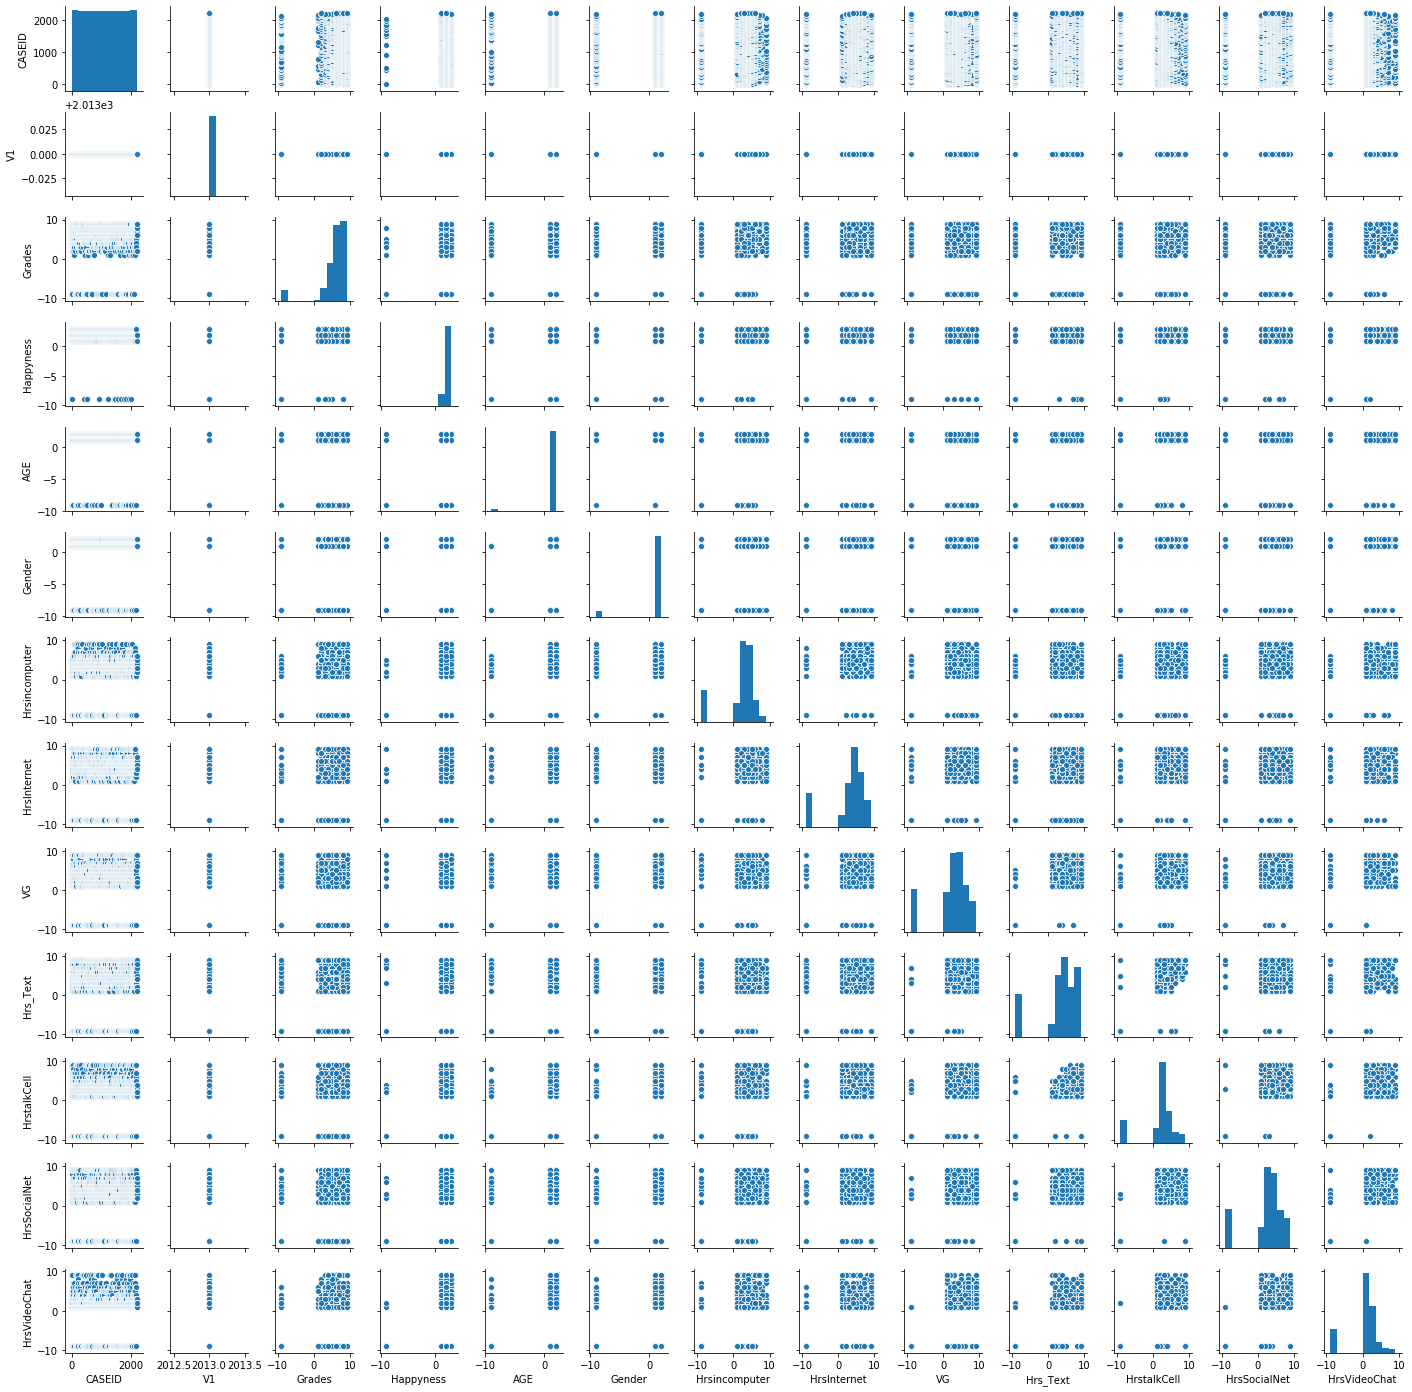

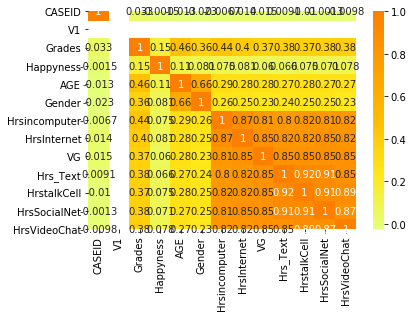

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt



sns.pairplot(df, height=1.5);
plt.show()



sns.heatmap(df.corr(), cmap ='Wistia', annot =True)
plt.show()

Aqui, é interessante entender como media se comporta cruzada com cada feature.



Lembrando que:

**Correlação ( -1 <=> 1 )**
- Correlação forte -> próxima de 1.
- Correlaçao media -> 0.4 < corr < 0.7
- Correlação fraca -> próxima de 0.
- Correlação inversa -> -1.



**Objetivo:** prever a media das notas



Logo, olhar correlacoes de horas da média de notas com cada feature



#### Observações



- Média e Horas de VideoGame : Observando uma correlaçao de 0.37, devidamente fraca, nota-se que quanto mais horas passadas jogando video game, nao, necessariamente, afetara na nota.

- Média e Horas de internet : Observando uma correlaçao de 0.4, devidamente moderada, nota-se que quanto mais horas navegando na internet, poderá afetar a na nota de alguma maneira.

- Média e Horas no computador : Observando uma correlaçao de 0.44, devidamente moderada, nota-se que quanto mais horas no computador, poderá afetar a na nota de alguma maneira.

- Média e Horas de ligaçao de celular : Observando uma correlaçao de 0.37, devidamente fraca, nota-se que quanto mais horas em uma ligaçao de celular, nao, necessariamente, afetará a nota.

- Média e Horas em redes sociais : Observando uma correlaçao de 0.38, devidamente fraca, nota-se que quanto mais horas em redes sociais, nao, necessariamente, afetará a nota.

- Média e Horas de VideoChat : Observando uma correlaçao de 0.38, devidamente fraca, nota-se que quanto mais horas em uma ligaçao de celular, nao, necessariamente, afetará a nota.


**...**

In [ ]:
git status
git add P2_Media_VideoGame.ipynb 
git status (tem q estar verde)
git commit -m "realizando a anlise exploratoria do target com as features"
git push